<a href="https://colab.research.google.com/github/chrismarkella/Kaggle-access-from-Google-Colab/blob/master/ted_talks_analyzis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Analyzing the Ted talks dataset.
Kudos to Kevin Markham
[YouTube](https://www.youtube.com/watch?v=dPwLlJkSHLo)
[GitHub](https://github.com/justmarkham/pycon-2019-tutorial)

##Setup

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
!ls -lh

total 7.3M
-rw-r--r-- 1 root root 7.3M Jan 20 04:30 ted.csv


In [3]:
cat ted.csv|head -3

comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
4553,Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education system that nurtures (rather than undermines) creativity.,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'n

##Getting to know the data
- load the data, `read_csv`
- dimension of the data, `shape`
- any missing values, `isnull().sum()`
- first few rows, `head`
- data types, `dtypes`
- 

In [4]:
csv_file_name = 'ted.csv'
df = pd.read_csv(csv_file_name, sep=',')
df.shape

(2550, 17)

In [5]:
df.isnull().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [6]:
df.head(2)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520


In [7]:
df.dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

##Questions

###Question 1
- Which talks provoke the most online discussion?

In [8]:
df.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')


####What are the meanings of these columns?
[Kaggle's Ted dataset description](https://www.kaggle.com/rounakbanik/ted-talks)
![alt text](https://drive.google.com/uc?id=1GNklwTSwXhGgViT8xDrCZUyTNc7KPUBV)

In [9]:
df.sort_values(by=['comments']).tail(3)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
644,3356,"Questions of good and evil, right and wrong ar...",1386,TED2010,1265846400,39,Sam Harris,Sam Harris: Science can answer moral questions,1,1269249180,"[{'id': 8, 'name': 'Informative', 'count': 923...","[{'id': 666, 'hero': 'https://pe.tedcdn.com/im...","Neuroscientist, philosopher","['culture', 'evolutionary psychology', 'global...",Science can answer moral questions,https://www.ted.com/talks/sam_harris_science_c...,3433437
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792


In [10]:
df['comments_per_view'] = df['comments'] / df['views']
df.sort_values(by=['comments_per_view']).tail(3)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220


In [11]:
df['views_per_comments'] = df['views'] / df['comments']
df.sort_values(['views_per_comments']).head(3)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view,views_per_comments
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220,450.531587
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534,651.739808
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464,683.134291


###Question 2
-Visualize the distribution of comments

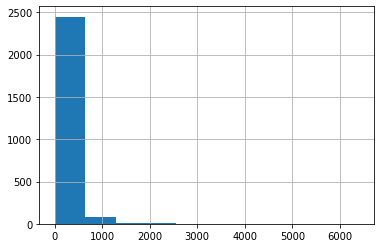

In [12]:
df.comments.hist()

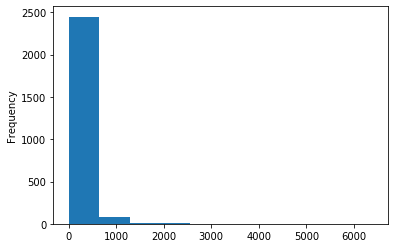

In [13]:
df.comments.plot(kind='hist')

In [14]:
outlier_filt = (df.comments > 1000)
outlier_filt.sum()

31

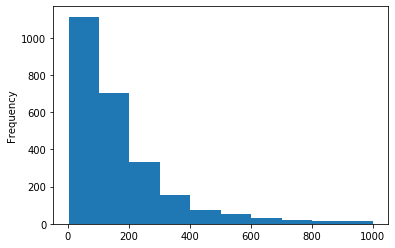

In [15]:
max_comment_1000_df = df.loc[~outlier_filt, 'comments']
max_comment_1000_df.plot(kind='hist')

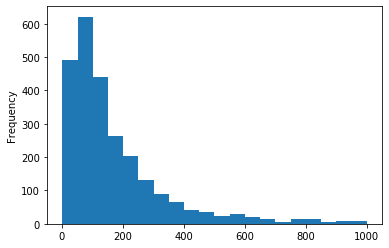

In [16]:
max_comment_1000_df.plot(kind='hist', bins=20)

###Question 3: Plot the number of talks that took place each year

In [17]:
df.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views', 'comments_per_view', 'views_per_comments'],
      dtype='object')

In [18]:
df.film_date.dtype

dtype('int64')

the description of the `film_date` column
![alt text](https://drive.google.com/uc?id=1-sWJWRe5hsE8WLXCLL5wn3rG6YEfPQ2A)

In [19]:
pd.to_datetime(df['film_date'])

0      1970-01-01 00:00:01.140825600
1      1970-01-01 00:00:01.140825600
2      1970-01-01 00:00:01.140739200
3      1970-01-01 00:00:01.140912000
4      1970-01-01 00:00:01.140566400
                    ...             
2545   1970-01-01 00:00:01.496707200
2546   1970-01-01 00:00:01.492992000
2547   1970-01-01 00:00:01.492992000
2548   1970-01-01 00:00:01.499472000
2549   1970-01-01 00:00:01.492992000
Name: film_date, Length: 2550, dtype: datetime64[ns]

pandas' to_datetime [documenation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)
![alt text](https://drive.google.com/uc?id=1flpyGqvwkwhf0BcIQmNGe7pVBAPIjscB)

In [20]:
df['film_datetime'] = pd.to_datetime(df['film_date'], unit='s')
df.loc[:3, 'film_datetime']

0   2006-02-25
1   2006-02-25
2   2006-02-24
3   2006-02-26
Name: film_datetime, dtype: datetime64[ns]

In [21]:
df.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views', 'comments_per_view', 'views_per_comments',
       'film_datetime'],
      dtype='object')

In [22]:
df.loc[:, ['event', 'film_datetime']].sample(5)

,event,film_datetime
2205,TED Talks Live,2015-11-06
176,TED2007,2007-03-03
358,TED in the Field,2008-12-04
1132,Mission Blue Voyage,2010-04-07
1200,TED2012,2012-02-29


In [23]:
df['film_date_year'] = df.film_datetime.dt.year
selected_columns = [
    'event',
    'film_datetime',
    'film_date_year',
]
df.loc[:, selected_columns].sample(5)

,event,film_datetime,film_date_year
2230,TEDxSydney,2016-05-24,2016
1487,TED@Intel,2013-04-08,2013
1106,TEDxMidAtlantic,2009-11-09,2009
1742,TEDxUMKC,2013-09-09,2013
2197,TEDMED 2015,2015-11-18,2015


In [24]:
events_per_year_ser = df.groupby(by=['film_date_year']).size()
events_per_year_ser

film_date_year
1972      1
1983      1
1984      1
1990      1
1991      1
1994      1
1998      6
2001      5
2002     27
2003     33
2004     33
2005     66
2006     50
2007    114
2008     84
2009    232
2010    267
2011    270
2012    267
2013    270
2014    237
2015    239
2016    246
2017     98
dtype: int64

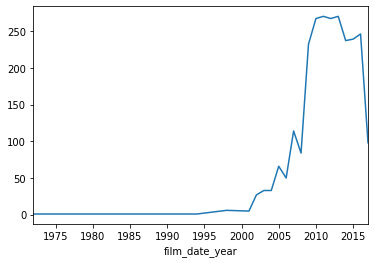

In [25]:
events_per_year_ser.plot(kind='line')